<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" data-toc-modified-id="https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb-1"><span class="toc-item-num">1&nbsp;&nbsp;</span><a href="https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb" rel="nofollow" target="_blank">https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb</a></a></span></li><li><span><a href="#LAB2-https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb" data-toc-modified-id="LAB2-https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>LAB2 <a href="https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb" rel="nofollow" target="_blank">https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb</a></a></span></li></ul></div>

# https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_1_improving_accuracy_using_convolutions.ipynb

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist

In [12]:
(training_images, training_labels),(test_images, test_labels) = mnist.load_data()

In [13]:
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [4]:
training_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

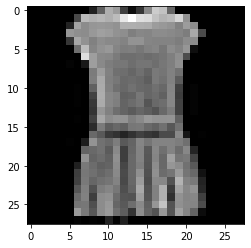

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# pick a sample to plot
sample = 3
image = training_images[sample]


# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [15]:
training_images, test_images = training_images/255.0, test_images/255.0

In [16]:
test_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05098039, 0.2627451 , 0.        , 0.        , 0.        ,
        0.        , 0.19607843, 0.14901961, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.03137255, 0.47058824, 0.81960784,
        0.88627451, 0.96862745, 0.92941176, 1.        , 1.        ,
        1.        , 0.96862745, 0.93333333, 0.92156863, 0.6745098 ,
        0.28235294, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.5372549 , 0.9372549 , 0.98823529, 0.95294118,
        0.91764706, 0.89803922, 0.93333333, 0.95686275, 0.96470588,
        0.94117647, 0.9019

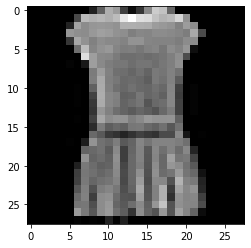

In [17]:
# pick a sample to plot
sample = 3
image = training_images[sample]


# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [19]:
import warnings
warnings.simplefilter("ignore")

In [24]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5018 - accuracy: 0.8242
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3773 - accuracy: 0.8639
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3398 - accuracy: 0.8753
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3158 - accuracy: 0.8831
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3000 - accuracy: 0.8879


In [25]:
test_loss = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3467 - accuracy: 0.8749


In [26]:
import tensorflow as tf
print(tf.__version__)
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
model.fit(training_images, training_labels, epochs=5)
test_loss = model.evaluate(test_images, test_labels)

2.7.0
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)        

In [29]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
print(training_images.shape)
training_images=training_images.reshape(60000, 28, 28, 1)
print(training_images.shape)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

(60000, 28, 28)
(60000, 28, 28, 1)


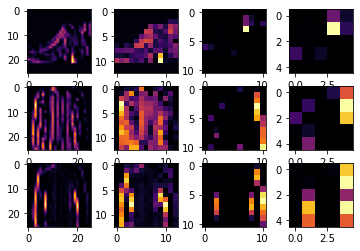

In [31]:
import matplotlib.pyplot as plt
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 2
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

# LAB2 https://github.com/https-deeplearning-ai/tensorflow-1-public/blob/main/C1/W3/ungraded_labs/C1_W3_Lab_2_exploring_convolutions.ipynb

In [35]:
! python -m pip install cv2
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


ModuleNotFoundError: No module named 'cv2'

In [40]:
DESIRED_ACCURACY = 0.999

print("\nReached %f accuracy so cancelling training!" %DESIRED_ACCURACY)


Reached 0.999000 accuracy so cancelling training!
